<a href="https://colab.research.google.com/github/macscheffer/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module1-OLS-regression/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [596]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [597]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = df.loc[:, ['sqft_living']].values
y = df.loc[:,['price']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train.shape

(10806, 1)

In [0]:

lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))

In [599]:
rmse, oos_mse, oos_r2

(261224.95845114524, 68238478917.80256, 0.4870198997391556)

In [600]:
# this is pretty bad lol
mean_absolute_error

<function sklearn.metrics.regression.mean_absolute_error>

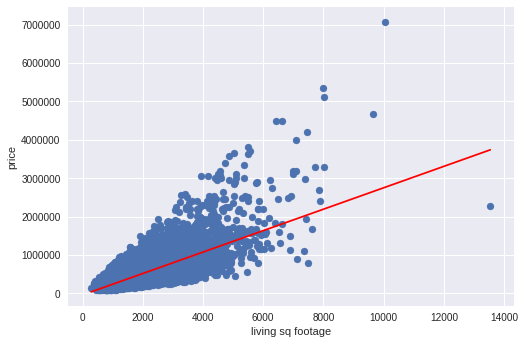

In [601]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

X_plot = np.arange(X_train.min(), X_train.max(), 1)

ax.plot(X_plot, lr.predict(X_plot.reshape(-1,1)), c='red', label='Line of Best Fit')
plt.scatter(X_train, y_train)

plt.xlabel('living sq footage')
plt.ylabel('price');

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [602]:
df.condition.value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [0]:
features = ['sqft_living', 'condition']
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

In [0]:
lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)


In [605]:
oos_mse, oos_r2

(68182455193.939705, 0.5029530188077118)

In [0]:
# still pretty bad. 

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [0]:
X = df.drop(columns=['price', 'id', 'date','zipcode', 'yr_renovated','yr_built'])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)


In [608]:
oos_mse, np.sqrt(oos_mse)

(46420260340.518364, 215453.61528764924)

In [609]:
oos_r2

0.6778685664930686

In [0]:
df['yrs_since_built']  = pd.to_datetime(df.date).dt.year - df.yr_built

In [611]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_since_built
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28


In [612]:
X = df.drop(columns=['price', 'id', 'date', 'zipcode','yr_renovated', 'yr_built'])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)

oos_mse, oos_r2

(39784243856.60301, 0.6978513494456076)

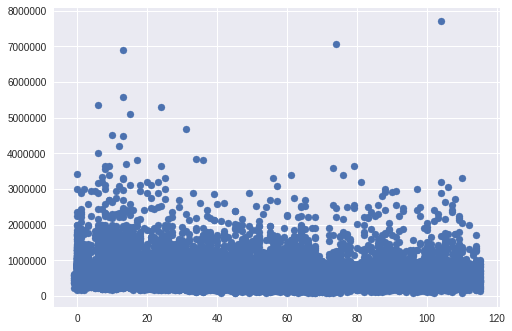

In [613]:
plt.scatter(df.yrs_since_built, df.price)

# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)


In [614]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_since_built
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28


In [615]:
X = df.loc[:, ['sqft_living']].values
y = df.loc[:,['price']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train.shape

lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)

oos_mse, oos_r2

(70385073896.01672, 0.49479937894746806)

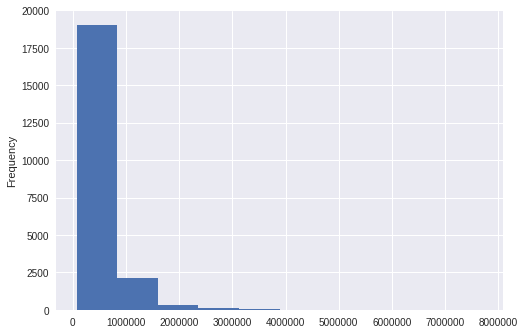

In [616]:
df.price.plot.hist()

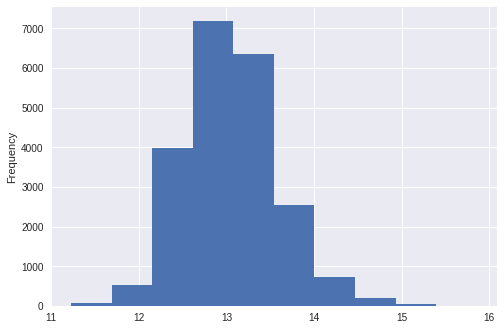

In [617]:
np.log(df.price).plot.hist()

In [0]:
df['log_price'] = np.log(df.price)

In [0]:
df['sqft_living_squared'] = df.sqft_living ** 2
df['sqft_living_log'] = np.log(df.sqft_living)

In [620]:
# mse, r2 of sq footage on just price (72999180594.88026, 0.4987502186736058)

X = df.loc[:, ['sqft_living']].values
y = df.loc[:,['log_price']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train.shape

lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse ,oos_mse, oos_r2

(0.37746500212035844, 0.14247982782572222, 0.47939984120168155)

In [621]:
# mse, r2 of sq footage on just price (72999180594.88026, 0.4987502186736058)

X = df.loc[:, ['sqft_living_squared']].values
y = df.loc[:,['price']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train.shape

lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse ,oos_mse, oos_r2

(258498.60104127906, 66821526740.29836, 0.505581727784898)

In [622]:
# mse, r2 of sq footage on just price (72999180594.88026, 0.4987502186736058)

X = df.loc[:, ['sqft_living_log']].values
y = df.loc[:,['log_price']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train.shape

lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse ,oos_mse, oos_r2

(0.3893372851442308, 0.1515835216034801, 0.45346658007609963)

In [623]:
# mse, r2 of sq footage on just price (72999180594.88026, 0.4987502186736058)

X = df.loc[:, ['grade']].values
y = df.loc[:,['log_price']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train.shape

lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse ,oos_mse, oos_r2

(0.37370773258540796, 0.1396574693941268, 0.5037659318672449)

In [0]:
# just exploring. okay lets try to make some good predictions

In [625]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_since_built,log_price,sqft_living_squared,sqft_living_log
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59,12.309982,1392400,7.073270
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63,13.195614,6604900,7.851661
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82,12.100712,592900,6.646391
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49,13.311329,3841600,7.580700
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28,13.142166,2822400,7.426549


In [0]:
# test one: 
  # sqft_living_squared => 245,040 RMSE

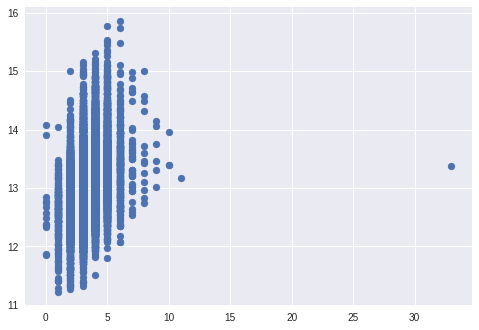

In [627]:
plt.scatter(df.bedrooms, df.log_price)

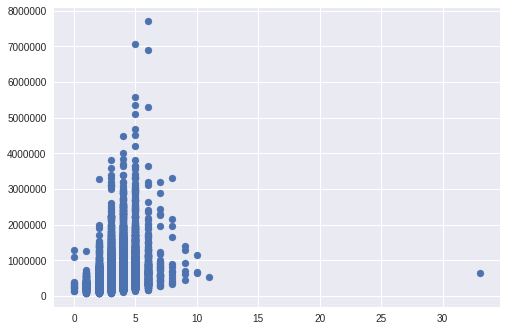

In [628]:
plt.scatter(df.bedrooms, df.price)

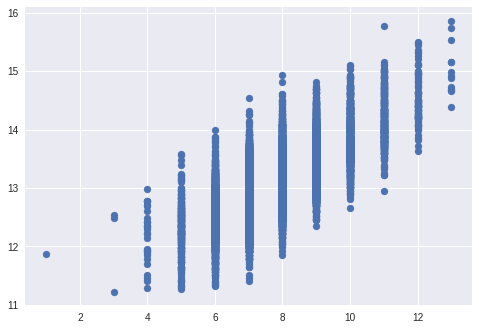

In [629]:
plt.scatter(df.grade, df.log_price)

In [0]:
df['grade_squared'] = df.grade ** 2

In [631]:
features = ['sqft_living_squared', 'grade_squared']
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse ,oos_mse, oos_r2

(241482.98542434824, 58314032249.45598, 0.5884827828273065)

In [0]:
# test one: 
  # sqft_living_squared
    # 245,040 RMSE

# test two:
  # 'sqft_living_squared', 'grade_squared'
    # 236,500 RMSE
    

In [632]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_since_built,log_price,sqft_living_squared,sqft_living_log,grade_squared
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59,12.309982,1392400,7.073270,49
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63,13.195614,6604900,7.851661,49
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82,12.100712,592900,6.646391,36
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49,13.311329,3841600,7.580700,49
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28,13.142166,2822400,7.426549,64


In [633]:
df.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


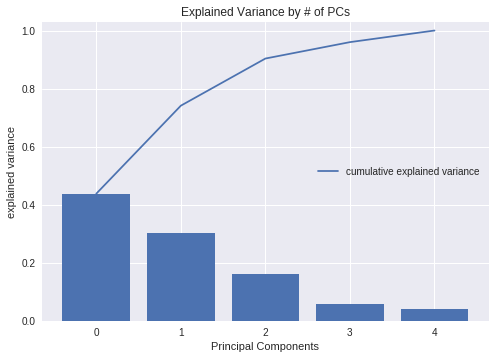

In [634]:
# i want to try to cluster some by sqft_living, sqft_lot, sqft_basement, sqft_living15, sqft_lot15

cols = ['sqft_living', 'sqft_lot', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

std_sc = StandardScaler()
df_std = std_sc.fit_transform(df[cols])

pca_all = PCA(5)
pc_all = pca_all.fit_transform(X=df_std)

plt.bar(range(0,5), pca_all.explained_variance_ratio_)
plt.plot(range(0,5), [sum(pca_all.explained_variance_ratio_[0:i]) for i in range(1,6)], label='cumulative explained variance')

plt.xlabel('Principal Components')
plt.ylabel('explained variance')
plt.title('Explained Variance by # of PCs')
plt.legend(loc=7)
plt.ylim(0,1.03)
plt.show()

In [635]:
pc_all

array([[-1.4359651 ,  0.58335106,  0.00454357,  0.00939024,  0.03945283],
       [-0.00270505, -0.36656358,  0.30648562,  0.08459686,  0.60659851],
       [-0.5642949 ,  0.25999128, -0.91266602, -0.181134  , -1.55125211],
       ...,
       [-1.87158531,  0.64532164,  0.23780342,  0.04454536,  0.20580152],
       [-1.22300122,  0.25808368, -0.13481657,  0.11536638,  0.30306951],
       [-1.88394956,  0.62803089,  0.23498189,  0.05674847,  0.20446523]])

In [0]:
pca_2_df = pd.DataFrame({'pc1': pc_all[:,0], 'pc2': pc_all[:,1]})
pca_3_df = pd.DataFrame({'pc1': pc_all[:,0], 'pc2': pc_all[:,1], 'pc3': pc_all[:,2]})


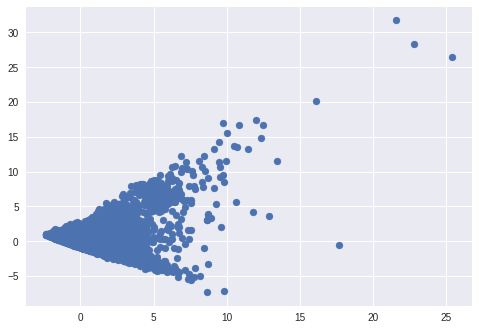

In [637]:
# this does not look like its doing a very good job.
plt.scatter(x='pc1', y='pc2', data=pca_2_df)

In [0]:
km = KMeans(n_clusters=2)
km = km.fit(pca_2_df[['pc1', 'pc2']])
pca_2_df['2_means_label'] = km.labels_
df['pca2_2_means_label'] = km.labels_

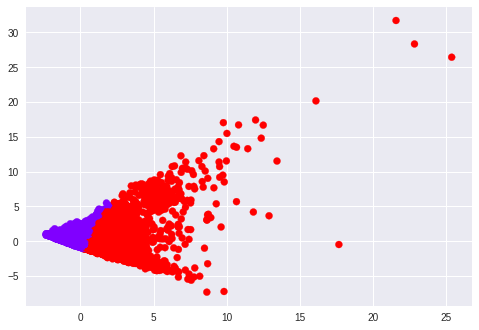

In [639]:
c = pca_2_df['2_means_label']
plt.scatter(x='pc1', y='pc2', data=pca_2_df, c=c)

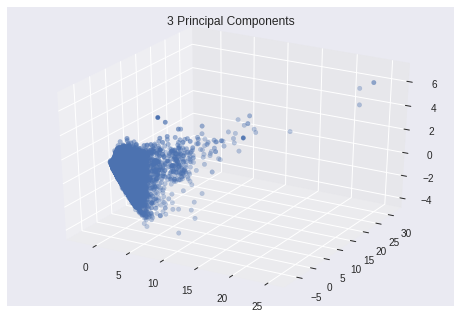

In [640]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('3 Principal Components')
ax.scatter(pca_3_df.pc1, pca_3_df.pc2, pca_3_df.pc3);

In [641]:
df.pivot_table(index='pca2_2_means_label', values='price')

,price
pca2_2_means_label,
0,418311.629500
1,821491.126991


In [0]:
km = KMeans(n_clusters=3)
km = km.fit(pca_2_df[['pc1', 'pc2']])
pca_2_df['2_means_label'] = km.labels_
df['pca2_3_means_label'] = km.labels_

In [643]:
# not as good i like the binary 2 means label.
df.pivot_table(index='pca2_3_means_label', values='price')

,price
pca2_3_means_label,
0,794274.071238
1,408360.001135
2,654699.559585


In [0]:
km = KMeans(n_clusters=2)
km = km.fit(pca_3_df[['pc1', 'pc2', 'pc3']])
pca_3_df['2_means_label'] = km.labels_
df['pca3_2_means_label'] = km.labels_

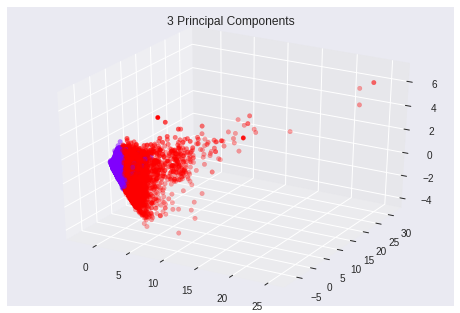

In [645]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('3 Principal Components')
ax.scatter(pca_3_df.pc1, pca_3_df.pc2, pca_3_df.pc3, c=pca_3_df['2_means_label'])

plt.set_cmap('rainbow');

In [646]:
df.pca3_2_means_label.value_counts()

0    15271
1     6342
Name: pca3_2_means_label, dtype: int64

In [647]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_since_built,log_price,sqft_living_squared,sqft_living_log,grade_squared,pca2_2_means_label,pca2_3_means_label,pca3_2_means_label
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59,12.309982,1392400,7.073270,49,0,1,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63,13.195614,6604900,7.851661,49,0,1,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82,12.100712,592900,6.646391,36,0,1,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49,13.311329,3841600,7.580700,49,0,1,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28,13.142166,2822400,7.426549,64,0,1,0


In [648]:
# about the same as without pca2_2_means_label
features = ['sqft_living_squared', 'grade_squared', 'pca2_2_means_label']
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(239441.89540123596, 0.5925032989918713, 57332421273.336426)

In [0]:
df['has_basement'] = (df.sqft_basement > 0)

In [650]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront']
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(228906.98555470165, 0.6001234345278204, 52398408035.74039)

In [0]:
df['view_4'] = (df.view == 4)
df['view_0'] = (df.view == 0)
df['view_2'] = (df.view == 2)


In [652]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0']
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(223795.65602891357, 0.6359450295693532, 50084495657.4118)

In [653]:
df.condition.value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [0]:
df['condition_1or2'] = ((df.condition == 1) | (df.condition ==2))

In [655]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2']
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(225410.2405406031, 0.6161769749314467, 50809776540.57254)

In [656]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_since_built,log_price,sqft_living_squared,sqft_living_log,grade_squared,pca2_2_means_label,pca2_3_means_label,pca3_2_means_label,has_basement,view_4,view_0,view_2,condition_1or2
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59,12.309982,1392400,7.07327,49,0,1,0,False,False,True,False,False


In [657]:
df['renovated'] = (df.yr_renovated > 0)
df.pivot_table(index='renovated', values='price')

,price
renovated,
False,530360.818155
True,760379.029540


In [658]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated']
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(218345.3209476396, 0.642369133053456, 47674679179.72774)

In [659]:
df['year_sold'] = pd.to_datetime(df.date).dt.year
df.year_sold.value_counts()

2014    14633
2015     6980
Name: year_sold, dtype: int64

In [660]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold']
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(221959.9284774258, 0.6257094333312314, 49266209849.70398)

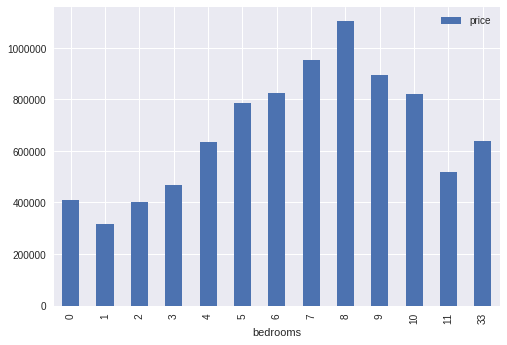

In [661]:
df.pivot_table(index='bedrooms', values='price').plot.bar()

In [662]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [0]:
df['bedrooms_missing'] = (df.bedrooms == 0)
df['bedrooms_alot'] = (df.bedrooms >= 9)
df['bedrooms_1'] = (df.bedrooms == 1)
df['bedrooms_2'] = (df.bedrooms == 2)
df['bedrooms_3'] = (df.bedrooms == 3)
df['bedrooms_4'] = (df.bedrooms == 4)
df['bedrooms_5'] = (df.bedrooms == 5)
df['bedrooms_6'] = (df.bedrooms == 6)
df['bedrooms_7'] = (df.bedrooms == 7)
df['bedrooms_8'] = (df.bedrooms == 8)

In [664]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(220105.48437128623, 0.6288290019456875, 48446424250.318535)

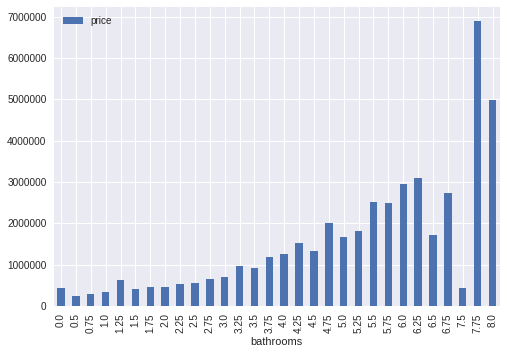

In [665]:
df.pivot_table(index='bathrooms', values='price').plot.bar()

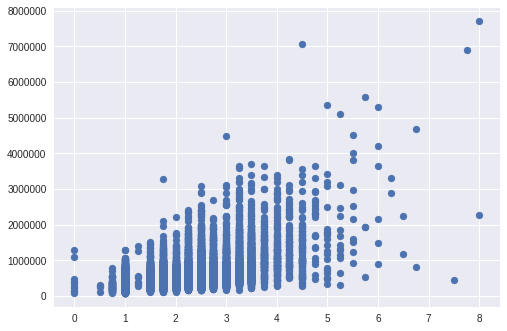

In [666]:
plt.scatter(df.bathrooms, df.price)

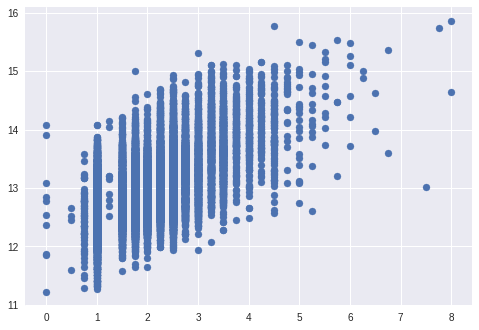

In [667]:
plt.scatter(df.bathrooms, df.log_price)

In [0]:
df['bathrooms_squared'] = df.bathrooms ** 2

In [669]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(221136.90522743034, 0.6465856939007013, 48901530853.565506)

In [0]:
df['old_not_renovated'] = df.yrs_since_built * df.renovated

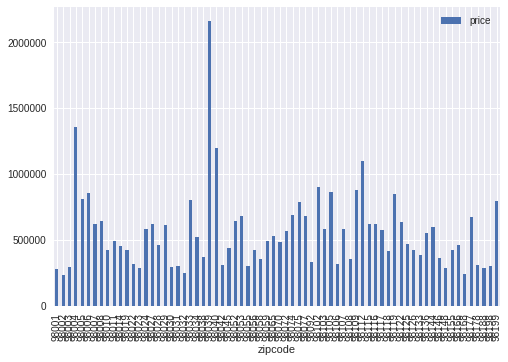

In [671]:
df.pivot_table(index='zipcode', values='price').plot.bar()

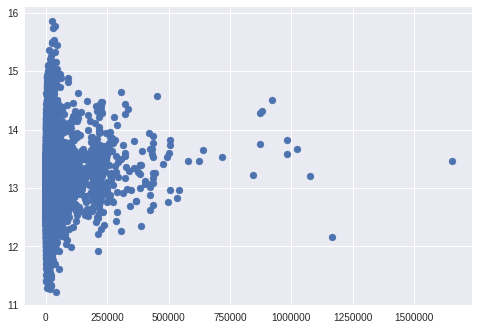

In [672]:
plt.scatter(df.sqft_lot, df.log_price)

In [673]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_lot']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(222248.0992577286, 0.6195965644080306, 49394217623.67319)

In [0]:
df['sqft_interaction'] = df.sqft_living_squared * df.sqft_lot

In [675]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(223335.55920336352, 0.6514130400012486, 49878772004.67909)

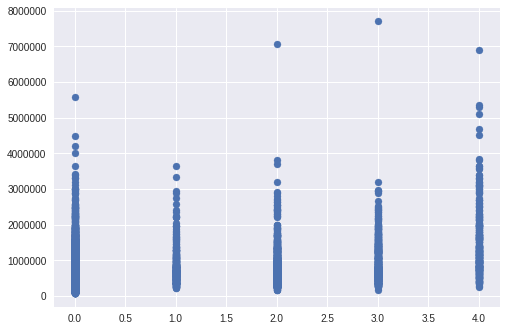

In [676]:
plt.scatter(df.view, df.price)

In [0]:
df['view_grade_interaction'] = df.view * df.grade_squared

In [678]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(212300.97411096352, 0.656785573718455, 45071703608.464005)

In [0]:
df.floors = df.floors.map({1:1, 1.5:1.5, 2:2, 3.5: 2.5, 3.0:2.5})

In [0]:
df.floors = df.floors.fillna(2.5)

In [709]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'floors']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(214633.51574006284, 0.6374323791951264, 46067546078.939804)

In [710]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_since_built,log_price,sqft_living_squared,sqft_living_log,grade_squared,pca2_2_means_label,pca2_3_means_label,pca3_2_means_label,has_basement,view_4,view_0,view_2,condition_1or2,renovated,year_sold,bedrooms_missing,bedrooms_alot,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bathrooms_squared,old_not_renovated,sqft_interaction,view_grade_interaction
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59,12.309982,1392400,7.073270,49,0,1,0,False,False,True,False,False,False,2014,False,False,False,False,True,False,False,False,False,False,1.0000,0,7867060000,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63,13.195614,6604900,7.851661,49,0,1,0,True,False,True,False,False,True,2014,False,False,False,False,True,False,False,False,False,False,5.0625,63,47832685800,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82,12.100712,592900,6.646391,36,0,1,0,False,False,True,False,False,False,2015,False,False,False,True,False,False,False,False,False,False,1.0000,0,5929000000,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49,13.311329,3841600,7.580700,49,0,1,0,True,False,True,False,False,False,2014,False,False,False,False,False,True,False,False,False,False,9.0000,0,19208000000,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28,13.142166,2822400,7.426549,64,0,1,0,False,False,True,False,False,False,2015,False,False,False,False,True,False,False,False,False,False,4.0000,0,22804992000,0


In [711]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [713]:
df.bedrooms.describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [725]:
df[df.bedrooms == 11].price.mean()

520000.0

In [720]:
df[df.bedrooms == 3].price.mean()

466232.07848127035

In [0]:
df.bedrooms = df.bedrooms.replace({33:4, 11:3})

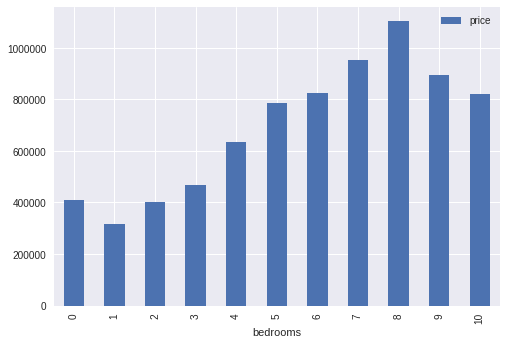

In [729]:
df.pivot_table(index='bedrooms', values='price').plot.bar()

In [0]:
df.bedrooms = df.bedrooms.replace({8:7, 9:7, 10:7})

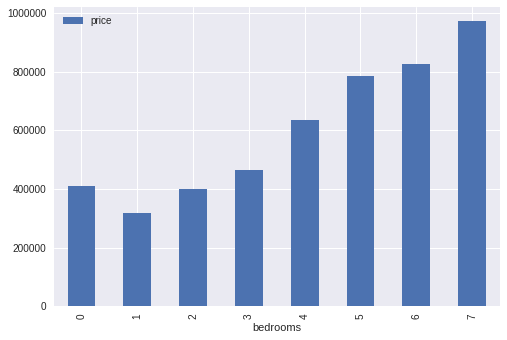

In [731]:
df.pivot_table(index='bedrooms', values='price').plot.bar()

In [741]:
(df.bedrooms / df.sqft_living_log).dropna().median()

0.41840306592108295

In [0]:
df['bedrooms_per_sqfoot_median'] = (df.bedrooms / df.sqft_living).dropna().median()


In [0]:
df['bedrooms_zero'] = (df.bedrooms == 0)
df['bedrooms_one'] = (df.bedrooms == 1)
df['bedrooms_two'] = (df.bedrooms == 2)
df['bedrooms_three_more'] = (df.bedrooms >= 3)

In [788]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one', 'bedrooms_two']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(218668.3611244516, 0.6602563290578038, 47815852156.85358)

In [0]:
df['bedrooms_one_or_two'] = ((df.bedrooms == 1) | (df.bedrooms == 2))

In [806]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(213512.98595983005, 0.6485702687100765, 45587795173.48259)

In [0]:
df['month'] = pd.to_datetime(df.date).dt.month

In [815]:
# handle zip codes because this is annoying

(317, 56)

In [824]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_since_built,log_price,sqft_living_squared,sqft_living_log,grade_squared,pca2_2_means_label,pca2_3_means_label,pca3_2_means_label,has_basement,view_4,view_0,view_2,condition_1or2,renovated,year_sold,bedrooms_missing,bedrooms_alot,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bathrooms_squared,old_not_renovated,sqft_interaction,view_grade_interaction,bedrooms_per_sqfoot_median,bedrooms_zero,bedrooms_one,bedrooms_two,bedrooms_three_more,bedrooms_one_or_two,month
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59,12.309982,1392400,7.073270,49,0,1,0,False,False,True,False,False,False,2014,False,False,False,False,True,False,False,False,False,False,1.0000,0,7867060000,0,0.001734,False,False,False,True,False,10
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63,13.195614,6604900,7.851661,49,0,1,0,True,False,True,False,False,True,2014,False,False,False,False,True,False,False,False,False,False,5.0625,63,47832685800,0,0.001734,False,False,False,True,False,12
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82,12.100712,592900,6.646391,36,0,1,0,False,False,True,False,False,False,2015,False,False,False,True,False,False,False,False,False,False,1.0000,0,5929000000,0,0.001734,False,False,True,False,True,2
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49,13.311329,3841600,7.580700,49,0,1,0,True,False,True,False,False,False,2014,False,False,False,False,False,True,False,False,False,False,9.0000,0,19208000000,0,0.001734,False,False,False,True,False,12
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28,13.142166,2822400,7.426549,64,0,1,0,False,False,True,False,False,False,2015,False,False,False,False,True,False,False,False,False,False,4.0000,0,22804992000,0,0.001734,False,False,False,True,False,2


In [0]:
df['yrs_since_built_squared'] = df.yrs_since_built ** 2

In [834]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(205954.65914350038, 0.6998115185773686, 42417321622.91543)

In [839]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(208732.1168819397, 0.6919571560448998, 43569096618.01574)

In [0]:
df['sqft_living15_squared'] = df.sqft_living15 ** 2

In [845]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(203941.3814227233, 0.6843196522840043, 41592087056.60871)

In [0]:
df['sqftliving_sqftliving15_interaction'] = df.sqft_living_squared - df.sqft_living15_squared

In [884]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(201581.875905895, 0.6941371677509514, 40635252693.73965)

In [885]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_since_built,log_price,sqft_living_squared,sqft_living_log,grade_squared,pca2_2_means_label,pca2_3_means_label,pca3_2_means_label,has_basement,view_4,view_0,view_2,condition_1or2,renovated,year_sold,bedrooms_missing,bedrooms_alot,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bathrooms_squared,old_not_renovated,sqft_interaction,view_grade_interaction,bedrooms_per_sqfoot_median,bedrooms_zero,bedrooms_one,bedrooms_two,bedrooms_three_more,bedrooms_one_or_two,month,yrs_since_built_squared,sqft_living15_squared,sqftliving_sqftliving15_interaction
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59,12.309982,1392400,7.073270,49,0,1,0,False,False,True,False,False,False,2014,False,False,False,False,True,False,False,False,False,False,1.0000,0,7867060000,0,0.001734,False,False,False,True,False,10,3481,1795600,-403200
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63,13.195614,6604900,7.851661,49,0,1,0,True,False,True,False,False,True,2014,False,False,False,False,True,False,False,False,False,False,5.0625,63,47832685800,0,0.001734,False,False,False,True,False,12,3969,2856100,3748800
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82,12.100712,592900,6.646391,36,0,1,0,False,False,True,False,False,False,2015,False,False,False,True,False,False,False,False,False,False,1.0000,0,5929000000,0,0.001734,False,False,True,False,True,2,6724,7398400,-6805500
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49,13.311329,3841600,7.580700,49,0,1,0,True,False,True,False,False,False,2014,False,False,False,False,False,True,False,False,False,False,9.0000,0,19208000000,0,0.001734,False,False,False,True,False,12,2401,1849600,1992000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28,13.142166,2822400,7.426549,64,0,1,0,False,False,True,False,False,False,2015,False,False,False,False,True,False,False,False,False,False,4.0000,0,22804992000,0,0.001734,False,False,False,True,False,2,784,3240000,-417600


In [0]:
km = KMeans(5)
km = km.fit(df[['lat','long']])

df['five_dif_locations'] = km.labels_

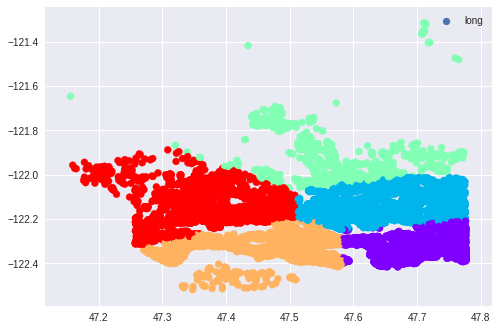

In [892]:
plt.scatter(df.lat,df.long, c=df.five_dif_locations)

In [0]:
df['loc1'] = (df.five_dif_locations == 0)
df['loc2'] = (df.five_dif_locations == 1)
df['loc3'] = (df.five_dif_locations == 2)
df['loc4'] = (df.five_dif_locations == 3)
df['loc5'] = (df.five_dif_locations == 4)

In [900]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared', 'loc1', 'loc2', 'loc3', 'loc4']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(183966.75900963758, 0.7462024693467144, 33843768420.510075)

In [901]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_since_built,log_price,sqft_living_squared,sqft_living_log,grade_squared,pca2_2_means_label,pca2_3_means_label,pca3_2_means_label,has_basement,view_4,view_0,view_2,condition_1or2,renovated,year_sold,bedrooms_missing,bedrooms_alot,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bathrooms_squared,old_not_renovated,sqft_interaction,view_grade_interaction,bedrooms_per_sqfoot_median,bedrooms_zero,bedrooms_one,bedrooms_two,bedrooms_three_more,bedrooms_one_or_two,month,yrs_since_built_squared,sqft_living15_squared,sqftliving_sqftliving15_interaction,five_dif_locations,loc1,loc2,loc3,loc4,loc5
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59,12.309982,1392400,7.073270,49,0,1,0,False,False,True,False,False,False,2014,False,False,False,False,True,False,False,False,False,False,1.0000,0,7867060000,0,0.001734,False,False,False,True,False,10,3481,1795600,-403200,3,False,False,False,True,False
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63,13.195614,6604900,7.851661,49,0,1,0,True,False,True,False,False,True,2014,False,False,False,False,True,False,False,False,False,False,5.0625,63,47832685800,0,0.001734,False,False,False,True,False,12,3969,2856100,3748800,0,True,False,False,False,False
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82,12.100712,592900,6.646391,36,0,1,0,False,False,True,False,False,False,2015,False,False,False,True,False,False,False,False,False,False,1.0000,0,5929000000,0,0.001734,False,False,True,False,True,2,6724,7398400,-6805500,0,True,False,False,False,False
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49,13.311329,3841600,7.580700,49,0,1,0,True,False,True,False,False,False,2014,False,False,False,False,False,True,False,False,False,False,9.0000,0,19208000000,0,0.001734,False,False,False,True,False,12,2401,1849600,1992000,3,False,False,False,True,False
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28,13.142166,2822400,7.426549,64,0,1,0,False,False,True,False,False,False,2015,False,False,False,False,True,False,False,False,False,False,4.0000,0,22804992000,0,0.001734,False,False,False,True,False,2,784,3240000,-417600,1,False,True,False,False,False


In [914]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared', 'loc1', 'loc2', 'loc3', 'loc4']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(183732.28918175728, 0.7503905461803629, 33757554087.96888)

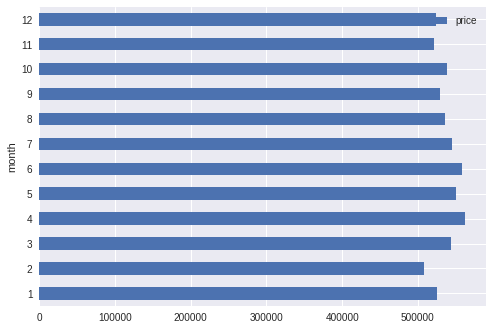

In [917]:
df.pivot_table(index='month', values='price').plot.barh()

In [0]:
df['is_winter_months'] = ((df.month >= 11) | (df.month <= 2))

In [926]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared', 'loc1', 'loc2', 'loc3', 'loc4', 'is_winter_months']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(180835.667478554, 0.754805175912574, 32701538632.414154)

In [0]:
df['floors_abv_ground'] = df.floors - df.has_basement

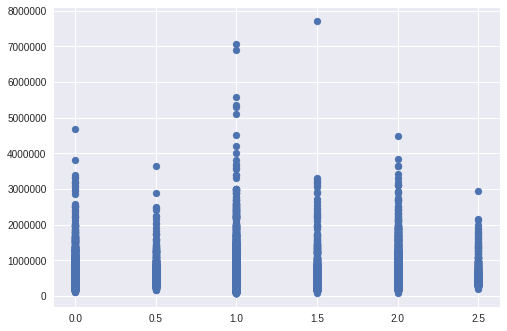

In [929]:
plt.scatter(df.floors_abv_ground, df.price)

In [0]:
df['split_level_home'] = (df.floors_abv_ground == 0.5)

In [958]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared', 'loc1', 'loc2', 'loc3', 'loc4', 'is_winter_months']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(181449.24033400466, 0.7488870340561442, 32923826817.787388)

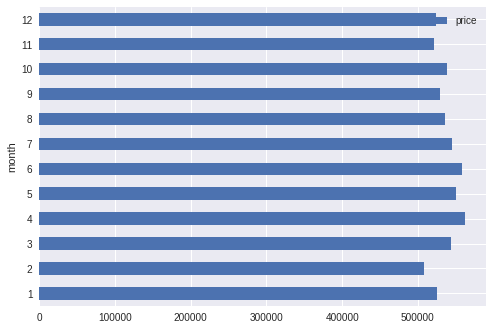

In [960]:
df.pivot_table(index='month', values='price').plot.barh()

In [0]:
df['first_post_winter_szn'] = ((df.month >=4) & (df.month <=6))

In [974]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared', 'loc1', 'loc2', 'loc3', 'loc4', 'is_winter_months',
            'first_post_winter_szn']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(179846.24654956, 0.7477606965515031, 32344672397.965115)

In [977]:
df.pivot_table(index='zipcode', values='price').sort_values('price', ascending=False)

,price
zipcode,
98039,2.160607e+06
98004,1.355927e+06
98040,1.194230e+06
98112,1.095499e+06
98102,9.012583e+05
98109,8.796236e+05
98105,8.628252e+05
98006,8.596848e+05
98119,8.494480e+05


In [978]:
df[df.zipcode == 98039].shape
df[((df.zipcode == 98117) | (df.zipcode == 98107) | (df.zipcode == 98024) | (df.zipcode == 98103))]

(50, 70)

In [0]:
df['zip_98039'] = (df.zipcode == 98039)
df['bad_zips'] = ((df.zipcode == 98117) | (df.zipcode == 98107) | (df.zipcode == 98024) | (df.zipcode == 98103))

In [984]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared', 'loc1', 'loc2', 'loc3', 'loc4', 'is_winter_months',
            'first_post_winter_szn', 'zip_98039']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(177263.5029211063, 0.7592601617087845, 31422349467.86106)

In [997]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared', 'loc1', 'loc2', 'loc3', 'loc4', 'is_winter_months',
            'first_post_winter_szn', 'zip_98039', 'bad_zips']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(172122.43289766976, 0.7600256863278323, 29626131906.61283)

In [1036]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared', 'loc1', 'loc2', 'loc3', 'loc4', 'is_winter_months',
            'first_post_winter_szn', 'zip_98039', 'bad_zips', 'view_0']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(177714.27393297415, 0.7577191207778825, 31582363159.524174)

In [1066]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared', 'loc1', 'loc2', 'loc3', 'loc4', 'is_winter_months',
            'first_post_winter_szn', 'zip_98039', 'bad_zips', 'view_0','pca3_2_means_label']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(173896.77531926217, 0.7674443432043623, 30240088466.437946)

In [1067]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_since_built,log_price,sqft_living_squared,sqft_living_log,grade_squared,pca2_2_means_label,pca2_3_means_label,pca3_2_means_label,has_basement,view_4,view_0,view_2,condition_1or2,renovated,year_sold,bedrooms_missing,bedrooms_alot,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bathrooms_squared,old_not_renovated,sqft_interaction,view_grade_interaction,bedrooms_per_sqfoot_median,bedrooms_zero,bedrooms_one,bedrooms_two,bedrooms_three_more,bedrooms_one_or_two,month,yrs_since_built_squared,sqft_living15_squared,sqftliving_sqftliving15_interaction,five_dif_locations,loc1,loc2,loc3,loc4,loc5,is_winter_months,floors_abv_ground,split_level_home,first_post_winter_szn,zip_98039,bad_zips,years_since_renovation
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59,12.309982,1392400,7.073270,49,0,1,0,False,False,True,False,False,False,2014,False,False,False,False,True,False,False,False,False,False,1.0000,0,7867060000,0,0.001734,False,False,False,True,False,10,3481,1795600,-403200,3,False,False,False,True,False,False,1.0,False,False,False,False,4056196
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63,13.195614,6604900,7.851661,49,0,1,0,True,False,True,False,False,True,2014,False,False,False,False,True,False,False,False,False,False,5.0625,63,47832685800,0,0.001734,False,False,False,True,False,12,3969,2856100,3748800,0,True,False,False,False,False,True,1.0,False,False,False,False,529
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82,12.100712,592900,6.646391,36,0,1,0,False,False,True,False,False,False,2015,False,False,False,True,False,False,False,False,False,False,1.0000,0,5929000000,0,0.001734,False,False,True,False,True,2,6724,7398400,-6805500,0,True,False,False,False,False,True,1.0,False,False,False,False,4060225
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49,13.311329,3841600,7.580700,49,0,1,0,True,False,True,False,False,False,2014,False,False,False,False,False,True,False,False,False,False,9.0000,0,19208000000,0,0.001734,False,False,False,True,False,12,2401,1849600,1992000,3,False,False,False,True,False,True,0.0,False,False,False,False,4056196
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28,13.142166,2822400,7.426549,64,0,1,0,False,False,True,False,False,False,2015,False,False,False,False,True,False,False,False,False,False,4.0000,0,22804992000,0,0.001734,False,False,False,True,False,2,784,3240000,-417600,1,False,True,False,False,False,True,1.0,False,False,False,False,4060225


In [0]:
df['condition_engineered'] = df.condition ** 2

In [0]:
df['condition_engineered'] = df.condition_engineered.replace({16: 9, 25:9})

In [1099]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared', 'loc1', 'loc2', 'loc3', 'loc4', 'is_winter_months',
            'first_post_winter_szn', 'zip_98039', 'bad_zips', 'view_0','pca3_2_means_label', 'condition_engineered']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(177374.4415957489, 0.7598163088191187, 31461692531.403744)

In [0]:
df['condition_engineered_grade_interaction'] = df.grade_squared * df.condition_engineered

In [1113]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared', 'loc1', 'loc2', 'loc3', 'loc4', 'is_winter_months',
            'first_post_winter_szn', 'zip_98039', 'bad_zips', 'view_0','pca3_2_means_label', 'condition_engineered', 'condition_engineered_grade_interaction']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(170942.74224360473, 0.7655589899991332, 29221421125.763485)

In [0]:
# more testing 

eng_df = df.copy()

eng_df = eng_df.drop(['date', 'id'],axis=1)

In [0]:
targets = eng_df.price
inputs = eng_df.drop('price',axis=1)


In [1123]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.5)

rfg = RandomForestRegressor(n_estimators=200)
rfg.fit(X_train, y_train)

oos_pred = rfg.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(41491.22602055998, 0.987262564060796, 1721521836.6891935)